In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# load csv file
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(df.shape)

(150, 5)


In [6]:
#checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Get the number of unique values in a specific column
unique_count = df['species'].nunique()
print(f"Number of unique values: {unique_count}")
print(df['species'].unique())

Number of unique values: 3
['setosa' 'versicolor' 'virginica']


In [9]:
from sklearn.model_selection import train_test_split
# 2. Separate Features (X) and Target (y)
X = df.drop('species', axis=1)
y = df['species']

# 3. Split Data (80% Train, 20% Test)
# Note: We are NOT scaling the data this time. Trees don't need it!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Task 4 Ready: Data Loaded and Split!")
print(f"Training shape: {X_train.shape}")

Task 4 Ready: Data Loaded and Split!
Training shape: (120, 4)


Model Accuracy: 100.00%


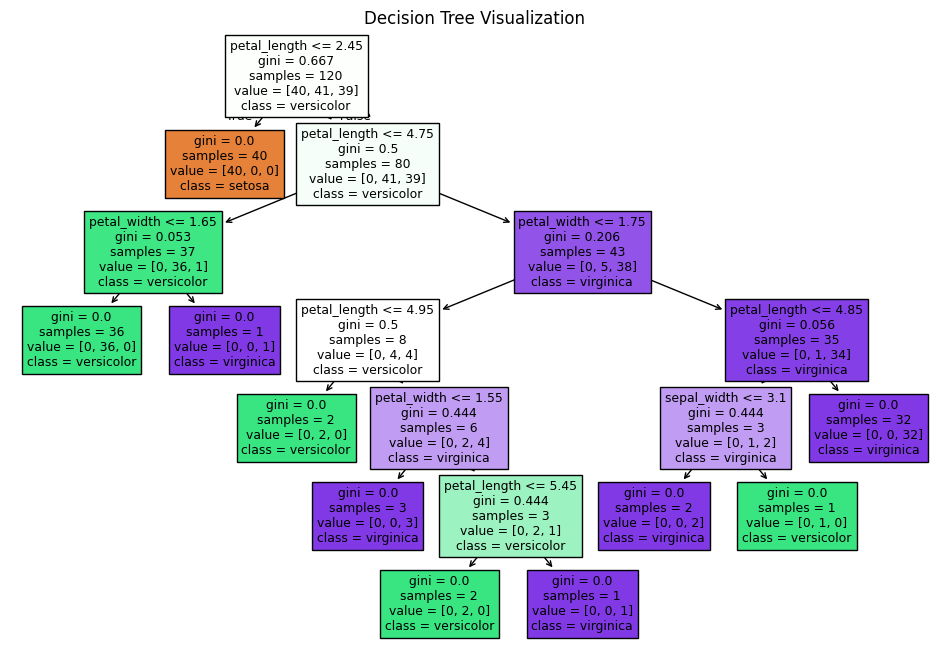

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Initialize the Decision Tree
# (We use random_state=42 so the tree looks the same every time we run it)
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the Model
dt_model.fit(X_train, y_train)

# 3. Check Accuracy
predictions = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 4. Visualize the Tree (The "White Box" part)
plt.figure(figsize=(12, 8))
plot_tree(dt_model, 
          feature_names=X.columns,  
          class_names=dt_model.classes_,
          filled=True)
plt.title("Decision Tree Visualization")
plt.show()